# Lets see which type of Wine is the favorite once ? 

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("./wine.csv")
df.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,$32,87,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15%,$17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5%,$18,86,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5%,$21,85,NaN,"This intriguing blend of Falanghina, Biancolel..."


In [3]:
df.shape


(323237, 11)

In [4]:
df.isnull().sum()

wine               0
winery             0
category           0
designation    93545
varietal       21047
appellation     2607
alcohol        41021
price          23955
rating             0
reviewer       72162
review          1129
dtype: int64

## we got a lot of data , lets only get which are not null value ( no gestion of nan with mean or other thing like that , the dataset is already big)

In [5]:
df = df.dropna().reset_index(drop=True)

In [6]:
df

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,"Livermore Valley, Central Coast, California, US",15.1%,$40,89,Virginie Boone,"This is a hefty Barbera, replete with dark, br..."
1,Yvon Mau NV Premius Brut Rosé (Crémant de Bor...,Yvon Mau,Sparkling,Premius Brut Rosé,"Sparkling Blend, Sparkling","Crémant de Bordeaux, Bordeaux, France",12%,$19,88,Roger Voss,"Made in a traditional style, this is a fruity,..."
2,Ata Rangi 2016 Crimson Pinot Noir (Martinborough),Ata Rangi,Red,Crimson,Pinot Noir,"Martinborough, New Zealand",13.5%,$30,89,Christina Pickard,"Founder Clive Paton is a keen conservationist,..."
3,Kaiken 2012 Reserva Malbec (Mendoza),Kaiken,Red,Reserva,Malbec,"Mendoza, Mendoza Province, Argentina",14.5%,$13,87,Michael Schachner,Brushy aromas of wild herbs along with cherry ...
4,Casa da Passarella 2012 Colheita Tinto Red (Dão),Casa da Passarella,Red,Colheita Tinto,Portuguese Red,"Dão, Portugal",13.5%,$15,88,Roger Voss,"A fresh and fruity, juicy wine that is just to..."
...,...,...,...,...,...,...,...,...,...,...,...
144841,Donnafugata 2014 Mille e una Notte Red (Terre ...,Donnafugata,Red,Mille e una Notte,"Red Blends, Red Blends","Terre Siciliane, Sicily & Sardinia, Italy",14%,$89,92,Kerin O’Keefe,"Underbrush, Mediterranean scrub, toast and exo..."
144842,Hudson-Chatham 2014 Columbia County Pinot Noir...,Hudson-Chatham,Red,Columbia County,Pinot Noir,"$25,Buy Now",12%,$25,90,Anna Lee C. Iijima,A bright star within Hudson-Chatham's strong l...
144843,Paul Cluver 2010 Noble Late Harvest Riesling (...,Paul Cluver,Dessert,Noble Late Harvest,Riesling,"Elgin, South Africa",10.5%,$22,92,Lauren Buzzeo,An attractive dessert wine at an incredibly at...
144844,Bott Frères 2017 Tradition Gewurztraminer (Als...,Bott Frères,White,Tradition,"Gewürztraminer, Gewürztraminer","Alsace, Alsace, France",13%,$50,88,Anne Krebiehl MW,Rich honeyed notes of baked apple and rose abo...


## Clean each Table 

In [7]:
df["alcohol"] = df["alcohol"] .str.strip('%')
df["alcohol"] 

0         15.1
1           12
2         13.5
3         14.5
4         13.5
          ... 
144841      14
144842      12
144843    10.5
144844      13
144845    14.3
Name: alcohol, Length: 144846, dtype: object

In [8]:
df["price"] = df["price"] .str.strip('$')
df["price"] 

0         40
1         19
2         30
3         13
4         15
          ..
144841    89
144842    25
144843    22
144844    50
144845    18
Name: price, Length: 144846, dtype: object

## Create 2 columns city and country to get better accuracy

In [9]:
df[['City', 'Country']] = df['appellation'].str.split(r',\s*', n=1, expand=True)
df[['City', 'Country']]

,City,Country
0,Livermore Valley,"Central Coast, California, US"
1,Crémant de Bordeaux,"Bordeaux, France"
2,Martinborough,New Zealand
3,Mendoza,"Mendoza Province, Argentina"
4,Dão,Portugal
...,...,...
144841,Terre Siciliane,"Sicily & Sardinia, Italy"
144842,$25,Buy Now
144843,Elgin,South Africa
144844,Alsace,"Alsace, France"


In [10]:
df

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,City,Country
0,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,"Livermore Valley, Central Coast, California, US",15.1,40,89,Virginie Boone,"This is a hefty Barbera, replete with dark, br...",Livermore Valley,"Central Coast, California, US"
1,Yvon Mau NV Premius Brut Rosé (Crémant de Bor...,Yvon Mau,Sparkling,Premius Brut Rosé,"Sparkling Blend, Sparkling","Crémant de Bordeaux, Bordeaux, France",12,19,88,Roger Voss,"Made in a traditional style, this is a fruity,...",Crémant de Bordeaux,"Bordeaux, France"
2,Ata Rangi 2016 Crimson Pinot Noir (Martinborough),Ata Rangi,Red,Crimson,Pinot Noir,"Martinborough, New Zealand",13.5,30,89,Christina Pickard,"Founder Clive Paton is a keen conservationist,...",Martinborough,New Zealand
3,Kaiken 2012 Reserva Malbec (Mendoza),Kaiken,Red,Reserva,Malbec,"Mendoza, Mendoza Province, Argentina",14.5,13,87,Michael Schachner,Brushy aromas of wild herbs along with cherry ...,Mendoza,"Mendoza Province, Argentina"
4,Casa da Passarella 2012 Colheita Tinto Red (Dão),Casa da Passarella,Red,Colheita Tinto,Portuguese Red,"Dão, Portugal",13.5,15,88,Roger Voss,"A fresh and fruity, juicy wine that is just to...",Dão,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144841,Donnafugata 2014 Mille e una Notte Red (Terre ...,Donnafugata,Red,Mille e una Notte,"Red Blends, Red Blends","Terre Siciliane, Sicily & Sardinia, Italy",14,89,92,Kerin O’Keefe,"Underbrush, Mediterranean scrub, toast and exo...",Terre Siciliane,"Sicily & Sardinia, Italy"
144842,Hudson-Chatham 2014 Columbia County Pinot Noir...,Hudson-Chatham,Red,Columbia County,Pinot Noir,"$25,Buy Now",12,25,90,Anna Lee C. Iijima,A bright star within Hudson-Chatham's strong l...,$25,Buy Now
144843,Paul Cluver 2010 Noble Late Harvest Riesling (...,Paul Cluver,Dessert,Noble Late Harvest,Riesling,"Elgin, South Africa",10.5,22,92,Lauren Buzzeo,An attractive dessert wine at an incredibly at...,Elgin,South Africa
144844,Bott Frères 2017 Tradition Gewurztraminer (Als...,Bott Frères,White,Tradition,"Gewürztraminer, Gewürztraminer","Alsace, Alsace, France",13,50,88,Anne Krebiehl MW,Rich honeyed notes of baked apple and rose abo...,Alsace,"Alsace, France"


In [11]:
df.drop(['appellation', 'reviewer'], axis=1, inplace=True)
df

,wine,winery,category,designation,varietal,alcohol,price,rating,review,City,Country
0,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,15.1,40,89,"This is a hefty Barbera, replete with dark, br...",Livermore Valley,"Central Coast, California, US"
1,Yvon Mau NV Premius Brut Rosé (Crémant de Bor...,Yvon Mau,Sparkling,Premius Brut Rosé,"Sparkling Blend, Sparkling",12,19,88,"Made in a traditional style, this is a fruity,...",Crémant de Bordeaux,"Bordeaux, France"
2,Ata Rangi 2016 Crimson Pinot Noir (Martinborough),Ata Rangi,Red,Crimson,Pinot Noir,13.5,30,89,"Founder Clive Paton is a keen conservationist,...",Martinborough,New Zealand
3,Kaiken 2012 Reserva Malbec (Mendoza),Kaiken,Red,Reserva,Malbec,14.5,13,87,Brushy aromas of wild herbs along with cherry ...,Mendoza,"Mendoza Province, Argentina"
4,Casa da Passarella 2012 Colheita Tinto Red (Dão),Casa da Passarella,Red,Colheita Tinto,Portuguese Red,13.5,15,88,"A fresh and fruity, juicy wine that is just to...",Dão,Portugal
...,...,...,...,...,...,...,...,...,...,...,...
144841,Donnafugata 2014 Mille e una Notte Red (Terre ...,Donnafugata,Red,Mille e una Notte,"Red Blends, Red Blends",14,89,92,"Underbrush, Mediterranean scrub, toast and exo...",Terre Siciliane,"Sicily & Sardinia, Italy"
144842,Hudson-Chatham 2014 Columbia County Pinot Noir...,Hudson-Chatham,Red,Columbia County,Pinot Noir,12,25,90,A bright star within Hudson-Chatham's strong l...,$25,Buy Now
144843,Paul Cluver 2010 Noble Late Harvest Riesling (...,Paul Cluver,Dessert,Noble Late Harvest,Riesling,10.5,22,92,An attractive dessert wine at an incredibly at...,Elgin,South Africa
144844,Bott Frères 2017 Tradition Gewurztraminer (Als...,Bott Frères,White,Tradition,"Gewürztraminer, Gewürztraminer",13,50,88,Rich honeyed notes of baked apple and rose abo...,Alsace,"Alsace, France"


In [12]:
df['Country'] = df['Country'].str.rsplit(',', n=1).str[-1].str.strip()
df

,wine,winery,category,designation,varietal,alcohol,price,rating,review,City,Country
0,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,15.1,40,89,"This is a hefty Barbera, replete with dark, br...",Livermore Valley,US
1,Yvon Mau NV Premius Brut Rosé (Crémant de Bor...,Yvon Mau,Sparkling,Premius Brut Rosé,"Sparkling Blend, Sparkling",12,19,88,"Made in a traditional style, this is a fruity,...",Crémant de Bordeaux,France
2,Ata Rangi 2016 Crimson Pinot Noir (Martinborough),Ata Rangi,Red,Crimson,Pinot Noir,13.5,30,89,"Founder Clive Paton is a keen conservationist,...",Martinborough,New Zealand
3,Kaiken 2012 Reserva Malbec (Mendoza),Kaiken,Red,Reserva,Malbec,14.5,13,87,Brushy aromas of wild herbs along with cherry ...,Mendoza,Argentina
4,Casa da Passarella 2012 Colheita Tinto Red (Dão),Casa da Passarella,Red,Colheita Tinto,Portuguese Red,13.5,15,88,"A fresh and fruity, juicy wine that is just to...",Dão,Portugal
...,...,...,...,...,...,...,...,...,...,...,...
144841,Donnafugata 2014 Mille e una Notte Red (Terre ...,Donnafugata,Red,Mille e una Notte,"Red Blends, Red Blends",14,89,92,"Underbrush, Mediterranean scrub, toast and exo...",Terre Siciliane,Italy
144842,Hudson-Chatham 2014 Columbia County Pinot Noir...,Hudson-Chatham,Red,Columbia County,Pinot Noir,12,25,90,A bright star within Hudson-Chatham's strong l...,$25,Buy Now
144843,Paul Cluver 2010 Noble Late Harvest Riesling (...,Paul Cluver,Dessert,Noble Late Harvest,Riesling,10.5,22,92,An attractive dessert wine at an incredibly at...,Elgin,South Africa
144844,Bott Frères 2017 Tradition Gewurztraminer (Als...,Bott Frères,White,Tradition,"Gewürztraminer, Gewürztraminer",13,50,88,Rich honeyed notes of baked apple and rose abo...,Alsace,France


In [13]:
df.dtypes


wine           object
winery         object
category       object
designation    object
varietal       object
alcohol        object
price          object
rating          int64
review         object
City           object
Country        object
dtype: object

In [14]:
# Convert column to integer data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')


df = df.dropna(subset=['price'])

df = df.reset_index(drop=True)

In [15]:
df.dtypes

wine            object
winery          object
category        object
designation     object
varietal        object
alcohol         object
price          float64
rating           int64
review          object
City            object
Country         object
dtype: object

In [16]:
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')


df = df.dropna(subset=['alcohol'])

df = df.reset_index(drop=True)

In [17]:
df.corr()


,alcohol,price,rating
alcohol,1.000000,0.005538,0.004998
price,0.005538,1.000000,0.394180
rating,0.004998,0.394180,1.000000


# We can see there is no correlation between this different columns

In [18]:

df = df.rename(columns={'alcohol': 'alcohol in % ', 'price': 'price in $', 'rating': 'rating /100'})

In [19]:
df

,wine,winery,category,designation,varietal,alcohol in %,price in $,rating /100,review,City,Country
0,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,15.1,40.0,89,"This is a hefty Barbera, replete with dark, br...",Livermore Valley,US
1,Yvon Mau NV Premius Brut Rosé (Crémant de Bor...,Yvon Mau,Sparkling,Premius Brut Rosé,"Sparkling Blend, Sparkling",12.0,19.0,88,"Made in a traditional style, this is a fruity,...",Crémant de Bordeaux,France
2,Ata Rangi 2016 Crimson Pinot Noir (Martinborough),Ata Rangi,Red,Crimson,Pinot Noir,13.5,30.0,89,"Founder Clive Paton is a keen conservationist,...",Martinborough,New Zealand
3,Kaiken 2012 Reserva Malbec (Mendoza),Kaiken,Red,Reserva,Malbec,14.5,13.0,87,Brushy aromas of wild herbs along with cherry ...,Mendoza,Argentina
4,Casa da Passarella 2012 Colheita Tinto Red (Dão),Casa da Passarella,Red,Colheita Tinto,Portuguese Red,13.5,15.0,88,"A fresh and fruity, juicy wine that is just to...",Dão,Portugal
...,...,...,...,...,...,...,...,...,...,...,...
141353,Donnafugata 2014 Mille e una Notte Red (Terre ...,Donnafugata,Red,Mille e una Notte,"Red Blends, Red Blends",14.0,89.0,92,"Underbrush, Mediterranean scrub, toast and exo...",Terre Siciliane,Italy
141354,Hudson-Chatham 2014 Columbia County Pinot Noir...,Hudson-Chatham,Red,Columbia County,Pinot Noir,12.0,25.0,90,A bright star within Hudson-Chatham's strong l...,$25,Buy Now
141355,Paul Cluver 2010 Noble Late Harvest Riesling (...,Paul Cluver,Dessert,Noble Late Harvest,Riesling,10.5,22.0,92,An attractive dessert wine at an incredibly at...,Elgin,South Africa
141356,Bott Frères 2017 Tradition Gewurztraminer (Als...,Bott Frères,White,Tradition,"Gewürztraminer, Gewürztraminer",13.0,50.0,88,Rich honeyed notes of baked apple and rose abo...,Alsace,France


In [38]:
wine_ratings = df.groupby("category")["rating /100"].agg("mean")
print(wine_ratings)

category
Dessert        90.372406
Fortified      90.445161
Port/Sherry    90.184641
Red            89.270751
Rose           87.403511
Sparkling      89.000976
White          88.922718
Name: rating /100, dtype: float64


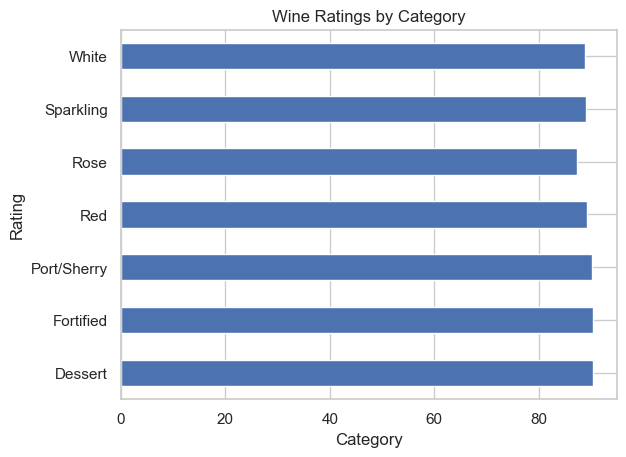

In [40]:
import matplotlib.pyplot as plt

#  plot of the wine ratings by category
wine_ratings.plot(kind="barh", x="category", y="rating /100")

# add labels and a title
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Wine Ratings by Category")

# display the plot
plt.show()

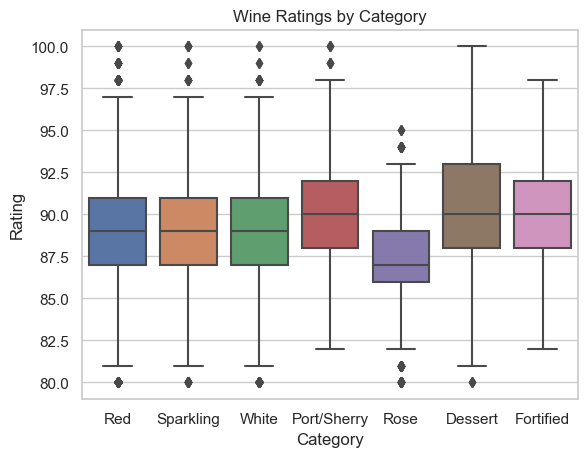

In [42]:
import seaborn as sns

#  plot of the wine ratings by category with box will give better vision
sns.boxplot(x="category", y="rating /100", data=df)

# a labels and a title
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Wine Ratings by Category")

# display the plot
plt.show()

# We have no idea of which is the favorite but i will find the best wine for me :  sucré ;not strong and lot of flavour aroms and not expensive ( less than 50  ( minimum ratings 90) )

### lets filter the dataframe

In [71]:

filtered_df = df.loc[(df['price in $'] < 50) & (df['rating /100'] > 90)].reset_index(drop=True)
filtered_df

,wine,winery,category,designation,varietal,alcohol in %,price in $,rating /100,review,City,Country
0,Herdade do Rocim 2014 Vale da Mata Reserva Red...,Herdade do Rocim,Red,Vale da Mata Reserva,Portuguese Red,13.5,35.0,94,From a small vineyard owned by the Vieira fami...,Lisboa,Portugal
1,Château Saint-Didier-Parnac 2011 Prieuré de Cé...,Château Saint-Didier-Parnac,Red,Prieuré de Cénac,Malbec,13.5,24.0,91,"A dark, brooding wine, packed with firm tannin...",Cahors,France
2,Companhia das Quintas 2005 Quinta do Cardo Sel...,Companhia das Quintas,Red,Quinta do Cardo Selecção do Enólogo,Portuguese Red,13.5,15.0,92,"Cool and tight, this is a firmly tannic wine, ...",Beira Interior,Portugal
3,Markus Huber 2019 Ried Alte Setzen Grüner Velt...,Markus Huber,White,Ried Alte Setzen,Grüner Veltliner,14.0,35.0,94,A streak of bright lemon zest accompanies the ...,Traisental,Austria
4,Seabold Cellars 2018 Rodnick Farm Old Vines Pi...,Seabold Cellars,White,Rodnick Farm Old Vines,Pinot Blanc,13.1,45.0,93,It's always a joy to taste the old vines of Ch...,Chalone,US
...,...,...,...,...,...,...,...,...,...,...,...
24117,Bischöfliche Weingüter Trier 2019 DOM Feinherb...,Bischöfliche Weingüter Trier,White,DOM Feinherb,Riesling,11.0,28.0,92,Inviting notes of white peach and blossom perf...,Mosel,Germany
24118,Encanto 2017 Encanto Vineyard Sauvignon Blanc ...,Encanto,White,Encanto Vineyard,Sauvignon Blanc,15.2,24.0,91,"This enticing wine is savory on the nose, disp...",Lake County,US
24119,Savage Grace 2018 Copeland Vineyard Cabernet F...,Savage Grace,Red,Copeland Vineyard,Cabernet Franc,13.0,30.0,92,"The aromas are arresting, with notes of fresh ...",Rattlesnake Hills,US
24120,Enrico Serafino 2020 del Comune di Gavi Grifo ...,Enrico Serafino,White,del Comune di Gavi Grifo del Quartaro,"Cortese, Italian White",12.5,21.0,91,This savory white opens with enticing scents o...,Gavi,Italy


### now lets  filter with the column review , i will create 2 list of vocabulary, and if there is one terms of each list in the comment , i will take it

In [72]:
flavored_bodied_terms = ['aromatic', 'flavorful', 'perfumed', 'savory', 'scrumptious', 'tasty', 'flavored', 'flavory', 'full-flavored', 'full-bodied', 'intense', 'rich', 'spicy', 'strong', 'sweet', 'tangy', 'tart', 'zingy', 'zesty', 'bold', 'robust', 'complex', 'nutty', 'smoky', 'earthy', 'herbaceous', 'fruity', 'citrusy', 'herbal', 'woody']
light_bodied_terms = ['crisp', 'refreshing', 'delicate', 'subtle', 'ethereal', 'airy', 'lively', 'vibrant', 'zesty', 'graceful', 'lithe', 'supple', 'silky', 'elegant', 'smooth', 'soft', 'mellow', 'gentle', 'soothing', 'relaxed', 'unassuming', 'modest', 'gracious', 'polished', 'understated', 'nuanced', 'balanced', 'harmonious', 'refined', 'precise']
sweet_terms = ['honeyed', 'luscious', 'syrupy', 'candied', 'dessert-like', 'rich', 'noble rot', 'botrytized', 'fruity', 'jammy']

In [59]:
print(len(flavored_bodied_terms))

30


#### now lets check if a value of the review column got one adjectiv of theses list

In [73]:
mask = filtered_df['review'].str.contains('|'.join(light_bodied_terms), case=False) & \
       filtered_df['review'].str.contains('|'.join(sweet_terms), case=False) & \
       filtered_df['review'].str.contains('|'.join(flavored_bodied_terms), case=False)

# Filter the dataframe based on the mask
filtered_taste_df = filtered_df[mask].reset_index(drop=True)

# Print the filtered dataframe
filtered_taste_df

,wine,winery,category,designation,varietal,alcohol in %,price in $,rating /100,review,City,Country
0,Boeckel 2015 Zotzenberg Grand Cru Riesling (Al...,Boeckel,White,Zotzenberg Grand Cru,Riesling,14.5,38.0,95,A lovely touch of orange zest teases the nose ...,Alsace,France
1,Thörle 2013 Saulheimer Probstey Trocken Silvan...,Thörle,White,Saulheimer Probstey Trocken,"Silvaner, Other White",13.5,39.0,91,"Often herbal and a bit green in nature, Silvan...",Rheinhessen,Germany
2,Baron Knyphausen 2011 Hattenheim Ortslage Kabi...,Baron Knyphausen,White,Hattenheim Ortslage Kabinett,Riesling,11.0,32.0,92,Fresh herbs and florals brighten the nose of t...,Rheingau,Germany
3,Casa do Valle 2015 Reserva Special Edition Whi...,Casa do Valle,White,Reserva Special Edition,Portuguese White,13.5,40.0,92,The blend of this rich wine is dominated by Al...,Vinho Verde,Portugal
4,Saint Clair 2013 Pioneer Block 24 Arthur Sauvi...,Saint Clair,White,Pioneer Block 24 Arthur,Sauvignon Blanc,13.0,27.0,91,"With only 56 cases imported, this may be one o...",Marlborough,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...
3391,Hermann J. Wiemer 2014 Magalena Vineyard Caber...,Hermann J. Wiemer,Red,Magalena Vineyard,Cabernet Franc,12.8,32.0,93,Hermann J. Wiemer may be synonymous with NY Ri...,Seneca Lake,US
3392,Erasmo 2009 Late Harvest Torontel (Maule Valley),Erasmo,Dessert,Late Harvest,"Torontel, Other White",12.5,40.0,92,"This Torontel is elegant and stately, deliveri...",Maule Valley,Chile
3393,Tatomer 2018 Vandenberg Riesling (Santa Barbar...,Tatomer,White,Vandenberg,Riesling,13.0,28.0,92,"Aromas of dried and wet grass, pomelo zest, li...",Santa Barbara County,US
3394,Château d'Ollières 2019 Haut de l'Autin Rosé (...,Château d'Ollières,Rose,Haut de l'Autin,Rosé,13.0,33.0,92,Made from the best parcels of the Ollières est...,Coteaux Varois en Provence,France


# Last i remember tha alcohol is not good for my health , lets get which got less 12  percent alcohol , and i am a good pratiot , i will take only who come from france and the best one ( 1 st rating)

In [91]:
filtered_responsable_df = filtered_taste_df.loc[(filtered_taste_df['Country'] == 'France') & (filtered_taste_df['alcohol in % '] < 12)].sort_values(by='rating /100', ascending=False).reset_index(drop=True)


In [93]:
filtered_responsable_df.head(1)

,wine,winery,category,designation,varietal,alcohol in %,price in $,rating /100,review,City,Country
0,Armand Hurst 2018 Vendanges Tardives Brand Cra...,Armand Hurst,Dessert,Vendanges Tardives Brand Crand Cru,"Gewürztraminer, Gewürztraminer",11.5,48.0,95,The headiness of candied mandarin and tangerin...,Alsace,France
